## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)

In [3]:
Y = -1*X + 2

#### Plot your data points. 

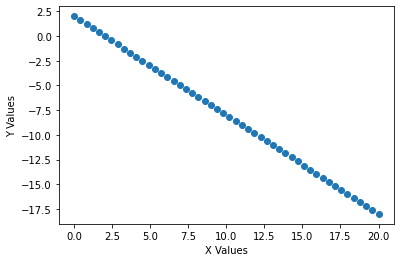

In [4]:
plt.scatter(X,Y)
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

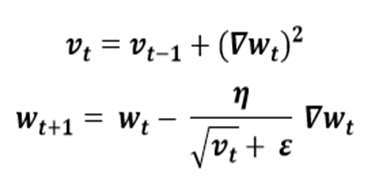

In [5]:
def Adagrad_BGD(X,Y,alpha = 0.0001, epsilon = 10**-8, max_iter=1000,tol=5):
    
    #Defining Model Parameters
    theta_0 = 0
    theta_1 = 0
    vt_theta_0 = 0
    vt_theta_1 = 0
    
    #Defining Hyper and Other Parameters
    alpha = alpha
    epsilon = epsilon
    
    tol = tol

    #Calculations
    h = theta_0 + theta_1*X
    j =(1/2)*((h - Y)**2).mean()
    
    grad_theta_0 = ((h - Y)).mean()
    vt_theta_0 += (grad_theta_0)**2
    theta_0 -= (alpha/(np.sqrt(vt_theta_0)+epsilon))*grad_theta_0
    
    grad_theta_1 = ((h - Y) * X).mean()
    vt_theta_1 += (grad_theta_1)**2
    theta_1 -= (alpha/(np.sqrt(vt_theta_1)+epsilon))*grad_theta_1
    
    #Iterations
    counter = 1
    list_j = [j]
    list_0 = [theta_0]
    list_1 = [theta_1]
    list_h = [h]

    while counter < max_iter:
        h = theta_0 + theta_1*X
        j_old = j
        j =(1/2)*((h - Y)**2).mean()
        if abs(j - j_old) < 10**-tol:
            break
        
        grad_theta_0 = ((h - Y)).mean()
        vt_theta_0 += (grad_theta_0)**2
        theta_0 -= (alpha/(np.sqrt(vt_theta_0)+epsilon))*grad_theta_0
    
        grad_theta_1 = ((h - Y) * X).mean()
        vt_theta_1 += (grad_theta_1)**2
        theta_1 -= (alpha/(np.sqrt(vt_theta_1)+epsilon))*grad_theta_1
    
        list_j.append(j)
        list_0.append(theta_0)
        list_1.append(theta_1)
        list_h.append(h)
        counter += 1
    return list_0,list_1,list_j,list_h,theta_0,theta_1,counter

No. of Epochs:  1000
R2Score:        0.9905363175024051


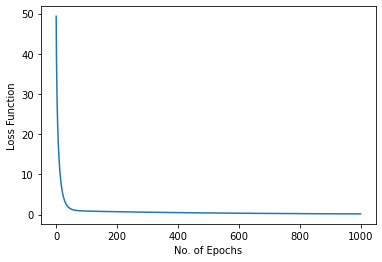

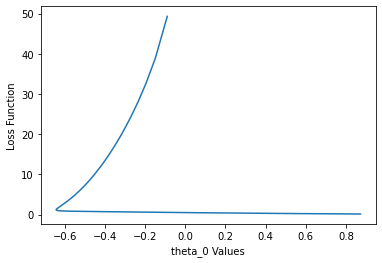

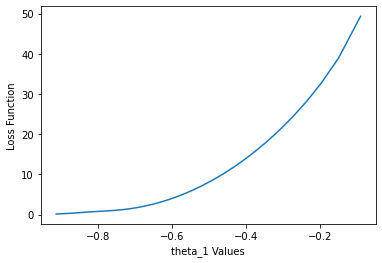

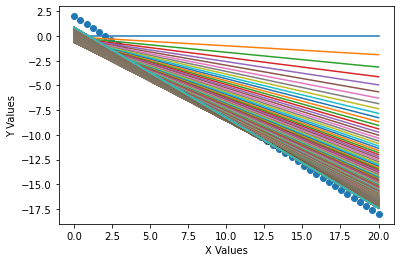

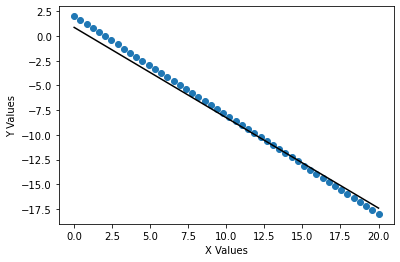

In [6]:
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = Adagrad_BGD(X,Y,alpha = .09, epsilon = 10**-8, max_iter=1000,tol=6)
print("No. of Epochs: ",epochs)
print("R2Score:       ", r2_score(Y, list_h[-1]))
#loss-epochs
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()
#loss-theta0
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()
#loss-theta1
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_1 Values")
plt.show()
#all fitted lines per epoch (single graph)
plt.scatter(X,Y)
for i in range(0,len(list_h),1):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
#best fit line
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

No. of Epochs:  217
R2Score:        0.9999988712755374


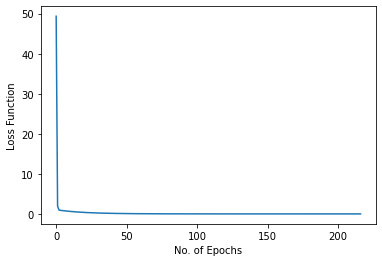

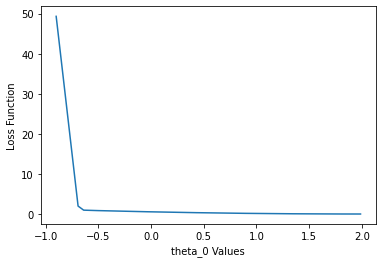

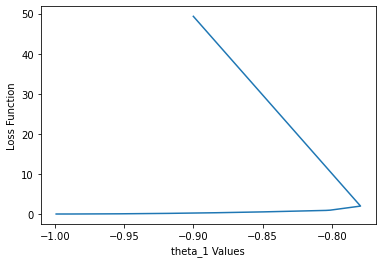

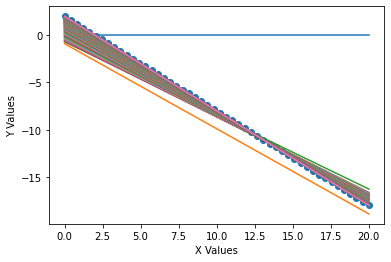

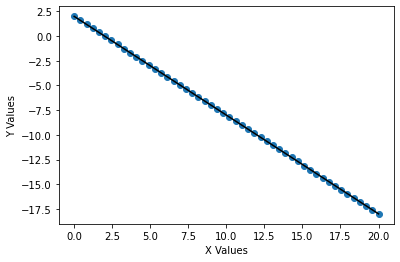

In [7]:
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = Adagrad_BGD(X,Y,alpha = .9, epsilon = 10**-8, max_iter=1000,tol=6)
print("No. of Epochs: ",epochs)
print("R2Score:       ", r2_score(Y, list_h[-1]))
#loss-epochs
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()
#loss-theta0
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()
#loss-theta1
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_1 Values")
plt.show()
#all fitted lines per epoch (single graph)
plt.scatter(X,Y)
for i in range(0,len(list_h),1):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
#best fit line
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

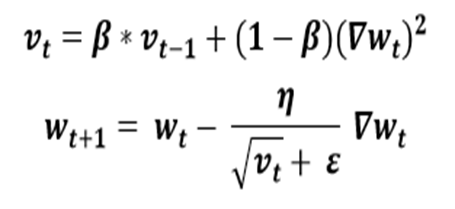

In [8]:
def RMSProp_BGD(X,Y, beta_1 = 0.999,alpha = 0.0001, epsilon = 10**-8, max_iter=1000,tol=5):
    
    #Defining Model Parameters
    theta_0 = 0
    theta_1 = 0
    vt_theta_0 = 0
    vt_theta_1 = 0
    
    #Defining Hyper and Other Parameters
    beta_1 = beta_1
    alpha = alpha
    epsilon = epsilon
    
    tol = tol

    #Calculations
    h = theta_0 + theta_1*X
    j =(1/2)*((h - Y)**2).mean()
    
    grad_theta_0 = ((h - Y)).mean()
    vt_theta_0 = beta_1 * vt_theta_0 + (1 - beta_1) * (grad_theta_0)**2
    theta_0 -= (alpha/(np.sqrt(vt_theta_0)+epsilon))*grad_theta_0
    
    grad_theta_1 = ((h - Y) * X).mean()
    vt_theta_1 = beta_1 * vt_theta_1 + (1 - beta_1) * (grad_theta_1)**2
    theta_1 -= (alpha/(np.sqrt(vt_theta_1)+epsilon))*grad_theta_1
    
    #Iterations
    counter = 1
    list_j = [j]
    list_0 = [theta_0]
    list_1 = [theta_1]
    list_h = [h]

    while counter < max_iter:
        h = theta_0 + theta_1*X
        j_old = j
        j =(1/2)*((h - Y)**2).mean()
        if abs(j - j_old) < 10**-tol:
            break
        
        grad_theta_0 = ((h - Y)).mean()
        vt_theta_0 = beta_1 * vt_theta_0 + (1 - beta_1) * (grad_theta_0)**2
        theta_0 -= (alpha/(np.sqrt(vt_theta_0)+epsilon))*grad_theta_0
    
        grad_theta_1 = ((h - Y) * X).mean()
        vt_theta_1 = beta_1 * vt_theta_1 + (1 - beta_1) * (grad_theta_1)**2
        theta_1 -= (alpha/(np.sqrt(vt_theta_1)+epsilon))*grad_theta_1
    
        list_j.append(j)
        list_0.append(theta_0)
        list_1.append(theta_1)
        list_h.append(h)
        counter += 1
    return list_0,list_1,list_j,list_h,theta_0,theta_1,counter

No. of Epochs:  428
R2Score:        0.9998870962771631


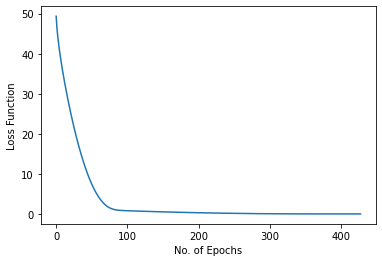

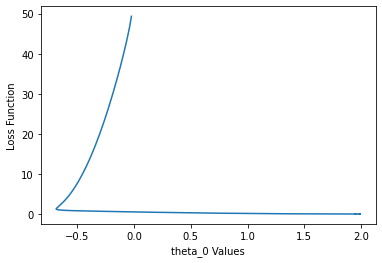

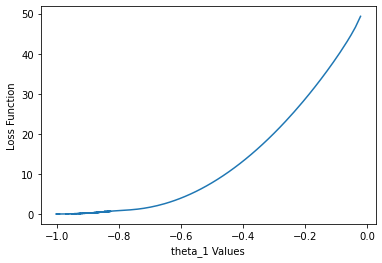

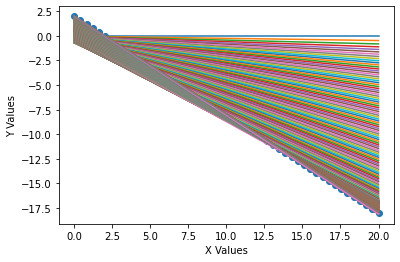

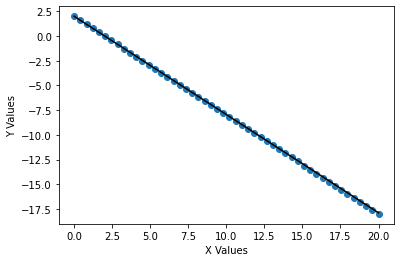

In [9]:
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = RMSProp_BGD(X,Y,beta_1=0.8, alpha = 0.01, epsilon = 10**-8, max_iter=1000,tol=6)
print("No. of Epochs: ",epochs)
print("R2Score:       ", r2_score(Y, list_h[-1]))
#loss-epochs
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()
#loss-theta0
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()
#loss-theta1
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_1 Values")
plt.show()
#all fitted lines per epoch (single graph)
plt.scatter(X,Y)
for i in range(0,len(list_h),1):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
#best fit line
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

No. of Epochs:  342
R2Score:        0.9999991445692801


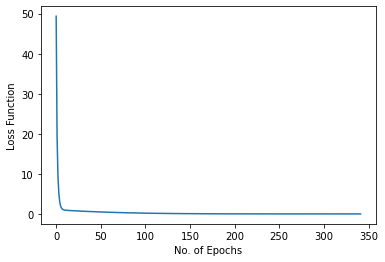

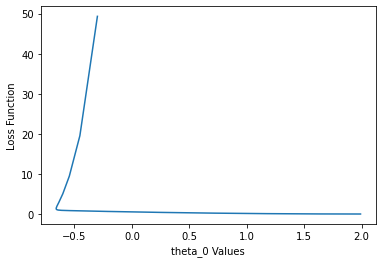

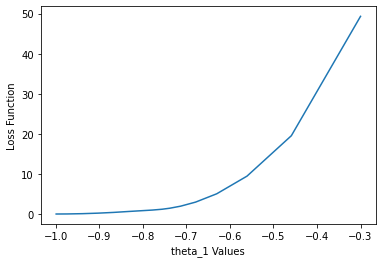

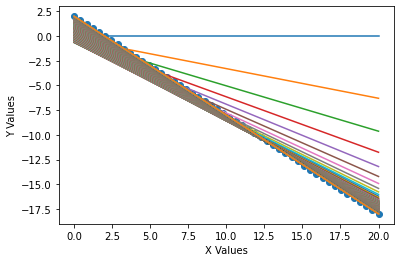

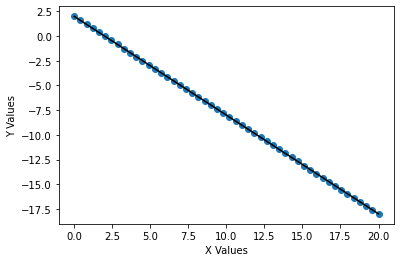

In [10]:
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = RMSProp_BGD(X,Y,beta_1=0.99, alpha = 0.03, epsilon = 10**-8, max_iter=1000,tol=6)
print("No. of Epochs: ",epochs)
print("R2Score:       ", r2_score(Y, list_h[-1]))
#loss-epochs
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()
#loss-theta0
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()
#loss-theta1
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_1 Values")
plt.show()
#all fitted lines per epoch (single graph)
plt.scatter(X,Y)
for i in range(0,len(list_h),1):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
#best fit line
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

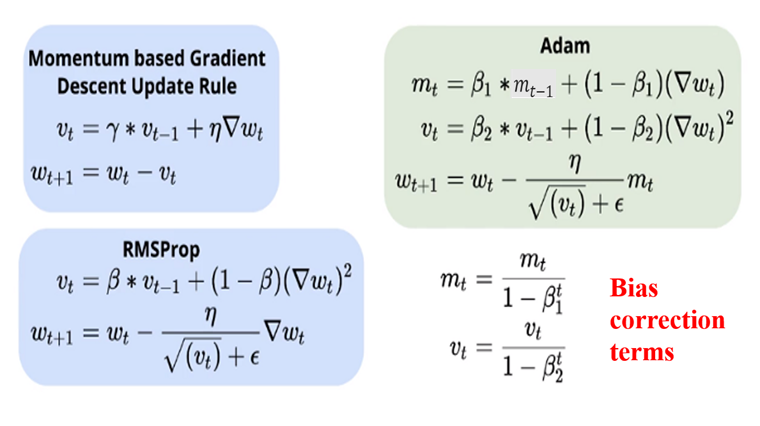

In [11]:
def Adam_BGD(X,Y,beta_1 = 0.9, beta_2 = 0.9, alpha = 0.01, epsilon = 10**-8, max_iter=1000,tol=5):
    
    #Defining Model Parameters
    theta_0 = 0
    theta_1 = 0
    
    vt_theta_0 = 0
    vt_theta_1 = 0
    
    mt_theta_0 = 0
    mt_theta_1 = 0
    
    #Defining Hyper and Other Parameters
    beta_1 = beta_1
    beta_2 = beta_2
    alpha = alpha
    epsilon = epsilon
    
    tol = tol

    #Calculations
    iter_no = 1
    h = theta_0 + theta_1*X
    j =(1/2)*((h - Y)**2).mean()
    
    grad_theta_0 = ((h - Y)).mean()
    
    mt_theta_0 = beta_1 * mt_theta_0 + (1 - beta_1) * (grad_theta_0)
    mt_theta_0 = mt_theta_0 /(1-(beta_1)**iter_no)
    
    vt_theta_0 = beta_2 * vt_theta_0 + (1 - beta_2) * (grad_theta_0)**2
    vt_theta_0 = vt_theta_0 /(1-(beta_2)**iter_no)

    theta_0 -= (alpha/(np.sqrt(vt_theta_0)+epsilon))*mt_theta_0
    
    grad_theta_1 = ((h - Y) * X).mean()
    
    mt_theta_1 = beta_1 * mt_theta_1 + (1 - beta_1) * (grad_theta_1)
    mt_theta_1 = mt_theta_1 /(1-(beta_1)**iter_no)
    
    vt_theta_1 = beta_2 * vt_theta_1 + (1 - beta_2) * (grad_theta_1)**2
    vt_theta_1 = vt_theta_1 /(1-(beta_2)**iter_no)

    theta_1 -= (alpha/(np.sqrt(vt_theta_1)+epsilon))*mt_theta_1
    
    #Iterations
    
    list_j = [j]
    list_0 = [theta_0]
    list_1 = [theta_1]
    list_h = [h]

    while iter_no < max_iter:
        h = theta_0 + theta_1*X
        j_old = j
        j =(1/2)*((h - Y)**2).mean()
        if abs(j - j_old) < 10**-tol:
            break
        
        iter_no += 1
        
        grad_theta_0 = ((h - Y)).mean()
    
        mt_theta_0 = beta_1 * mt_theta_0 + (1 - beta_1) * (grad_theta_0)
        mt_theta_0 = mt_theta_0 /(1-(beta_1)**iter_no)

        vt_theta_0 = beta_2 * vt_theta_0 + (1 - beta_2) * (grad_theta_0)**2
        vt_theta_0 = vt_theta_0 /(1-(beta_2)**iter_no)

        theta_0 -= (alpha/(np.sqrt(vt_theta_0)+epsilon))*mt_theta_0

        grad_theta_1 = ((h - Y) * X).mean()

        mt_theta_1 = beta_1 * mt_theta_1 + (1 - beta_1) * (grad_theta_1)
        mt_theta_1 = mt_theta_1 /(1-(beta_1)**iter_no)

        vt_theta_1 = beta_2 * vt_theta_1 + (1 - beta_2) * (grad_theta_1)**2
        vt_theta_1 = vt_theta_1 /(1-(beta_2)**iter_no)

        theta_1 -= (alpha/(np.sqrt(vt_theta_1)+epsilon))*mt_theta_1
    
        list_j.append(j)
        list_0.append(theta_0)
        list_1.append(theta_1)
        list_h.append(h)
        
    return list_0,list_1,list_j,list_h,theta_0,theta_1,iter_no

No. of Epochs:  114
R2Score:        0.6628170614834727


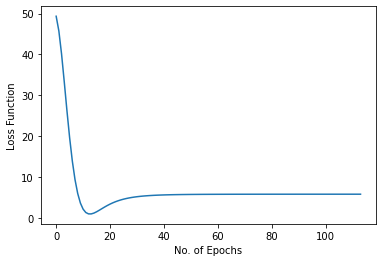

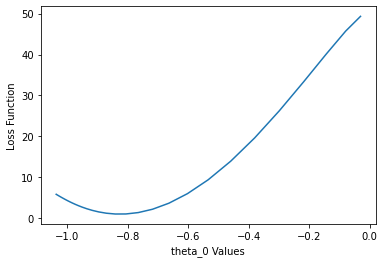

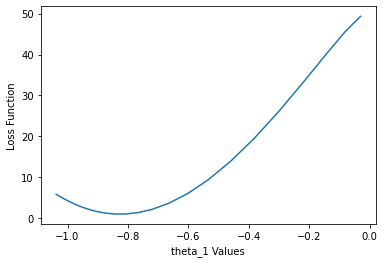

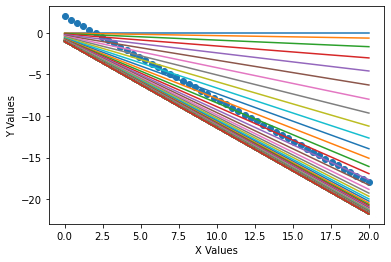

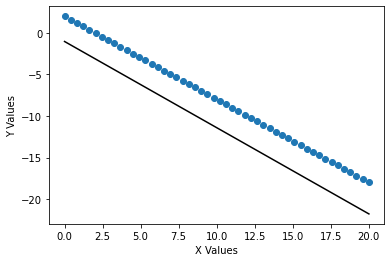

In [12]:
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = Adam_BGD(X,Y, beta_1=0.9, beta_2= 0.95, alpha = .03, epsilon = 10**-8, max_iter=1000,tol=5)
print("No. of Epochs: ",epochs)
print("R2Score:       ", r2_score(Y, list_h[-1]))
#loss-epochs
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()
#loss-theta0
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()
#loss-theta1
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_1 Values")
plt.show()
#all fitted lines per epoch (single graph)
plt.scatter(X,Y)
for i in range(0,len(list_h),1):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
#best fit line
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

No. of Epochs:  686
R2Score:        0.9999319962852061


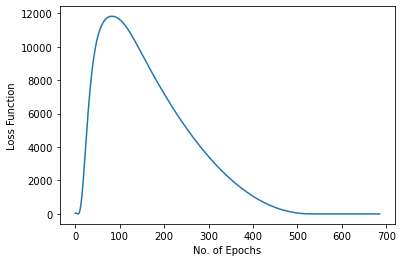

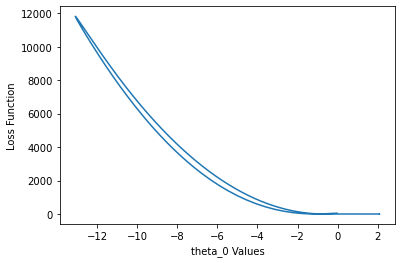

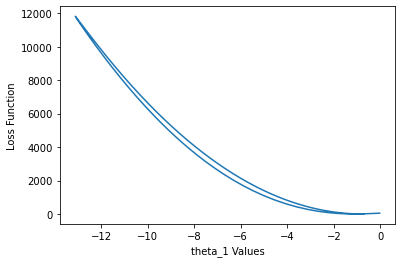

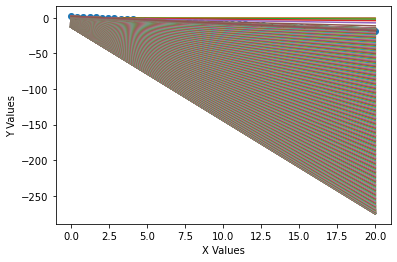

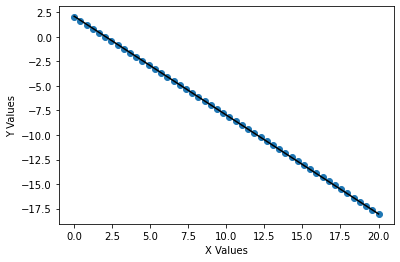

In [13]:
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = Adam_BGD(X,Y, beta_1=0.9, beta_2= 0.92, alpha = .03, epsilon = 10**-8, max_iter=1000,tol=5)
print("No. of Epochs: ",epochs)
print("R2Score:       ", r2_score(Y, list_h[-1]))
#loss-epochs
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()
#loss-theta0
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()
#loss-theta1
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_1 Values")
plt.show()
#all fitted lines per epoch (single graph)
plt.scatter(X,Y)
for i in range(0,len(list_h),1):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
#best fit line
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

# Comparing

=======================Adagrad========================
No. of Epochs:  1000
R2Score:        0.9532261232230504


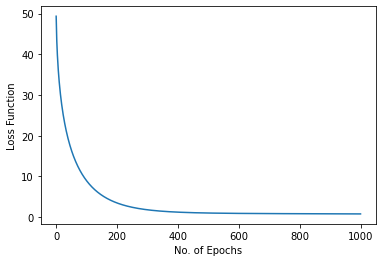

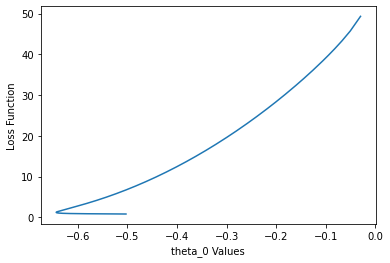

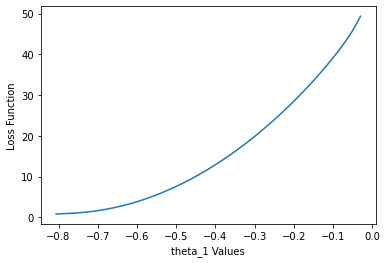

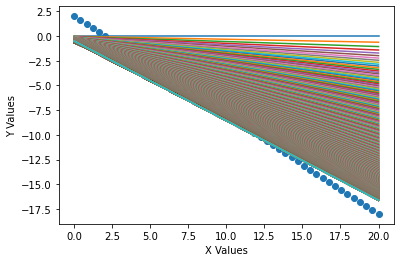

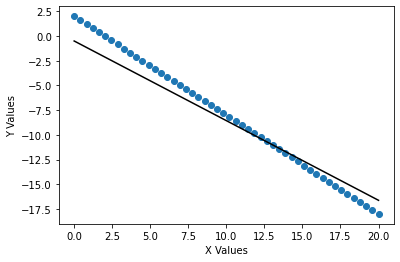

=======================RMSProp========================
No. of Epochs:  306
R2Score:        0.9989866761760734


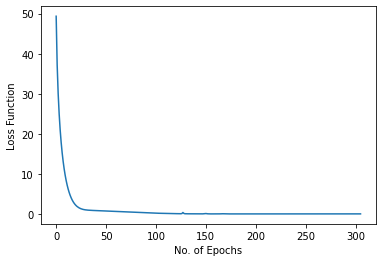

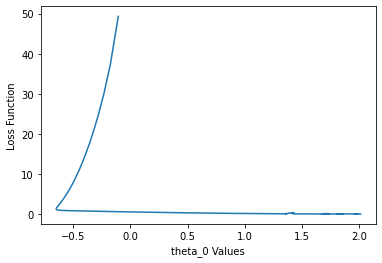

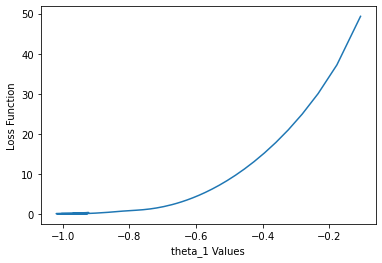

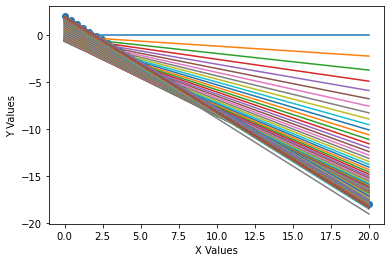

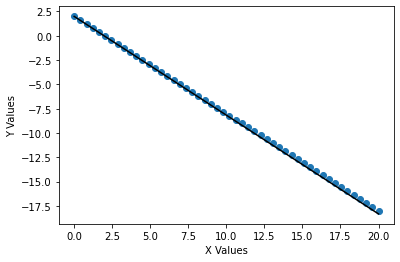

=========================Adam=========================
No. of Epochs:  829
R2Score:        0.9999937720476771


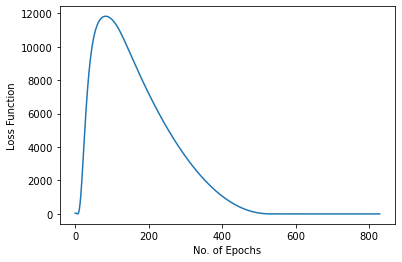

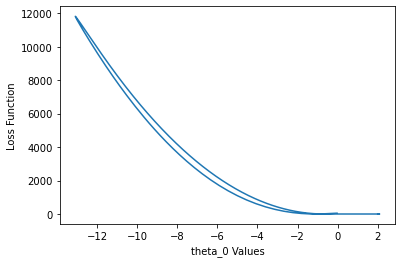

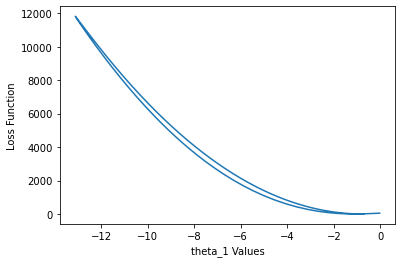

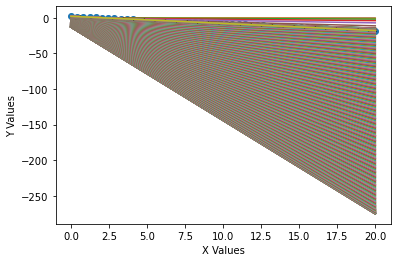

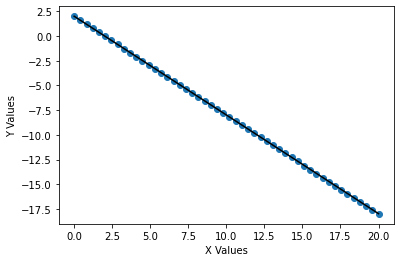

In [16]:
print("=======================Adagrad========================")
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = Adagrad_BGD(X,Y,alpha = .03, epsilon = 10**-8, max_iter=1000,tol=6)
print("No. of Epochs: ",epochs)
print("R2Score:       ", r2_score(Y, list_h[-1]))
#loss-epochs
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()
#loss-theta0
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()
#loss-theta1
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_1 Values")
plt.show()
#all fitted lines per epoch (single graph)
plt.scatter(X,Y)
for i in range(0,len(list_h),1):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
#best fit line
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
print("======================================================")
print("=======================RMSProp========================")
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = RMSProp_BGD(X,Y,beta_1=0.92, alpha = 0.03, epsilon = 10**-8, max_iter=1000,tol=6)
print("No. of Epochs: ",epochs)
print("R2Score:       ", r2_score(Y, list_h[-1]))
#loss-epochs
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()
#loss-theta0
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()
#loss-theta1
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_1 Values")
plt.show()
#all fitted lines per epoch (single graph)
plt.scatter(X,Y)
for i in range(0,len(list_h),1):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
#best fit line
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
print("======================================================")
print("=========================Adam=========================")
list_0,list_1,list_j,list_h,theta_0,theta_1,epochs = Adam_BGD(X,Y, beta_1=0.9, beta_2= 0.92, alpha = .03, epsilon = 10**-8, max_iter=1000,tol=6)
print("No. of Epochs: ",epochs)
print("R2Score:       ", r2_score(Y, list_h[-1]))
#loss-epochs
plt.plot(list_j)
plt.ylabel("Loss Function")
plt.xlabel("No. of Epochs")
plt.show()
#loss-theta0
plt.plot(list_0,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_0 Values")
plt.show()
#loss-theta1
plt.plot(list_1,list_j)
plt.ylabel("Loss Function")
plt.xlabel("theta_1 Values")
plt.show()
#all fitted lines per epoch (single graph)
plt.scatter(X,Y)
for i in range(0,len(list_h),1):
    plt.plot(X,list_h[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
#best fit line
plt.scatter(X,Y)
plt.plot(X,list_h[-1],color="black")
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()
print("======================================================")

## Congratulations 
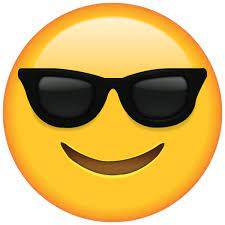